# Example 3.2: Fourier transform by numerical integration
In this example, we will calculate the Fourier transform of the function.

$$ x(t) = \left\{ \begin{array} {c} e^{-\alpha t} \quad  t\ge 0 \\ 0 \quad t < 0 \end{array} \right. $$

It is assumed that $\alpha>0$. We set $\alpha=1$ in this example. We start by plotting the function:

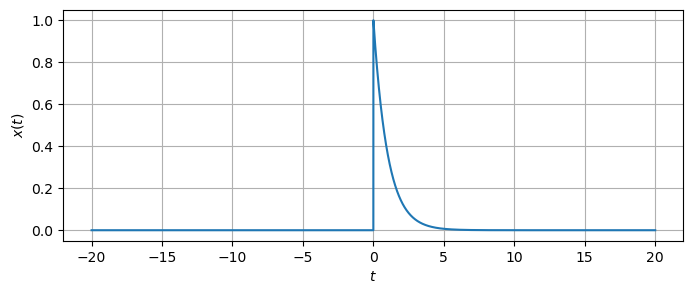

In [1]:
import numpy as np
from matplotlib import pyplot as plt

alpha = 1.0
t = np.linspace(-20.0,20.0,10001)
x = np.exp(-alpha*t)
x[t<0] = 0

plt.figure(figsize=(8, 3))
plt.plot(t,x)
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.grid()

The (complex) Fourier transform is defined by:
$$X(\omega) = \frac{1}{2\pi}  \int_{-\infty} ^{\infty} x(t) e^{-i\omega t} dt$$

## Analytical results
We start by calculating the Fourier transform analytically:
$$X(\omega) = \frac{1}{2\pi}  \int_{-\infty} ^{\infty} x(t) e^{-i\omega t} dt$$

$$X(\omega) = \frac{1}{2\pi}  \int_{0} ^{\infty} e^{-i\alpha t} e^{-i\omega t}dt $$

$$ X(\omega) = \frac{1}{2\pi}  \int_{0} ^{\infty} e^{-(\alpha + i\omega t)} dt$$

$$ X(\omega) = -\frac{1}{2\pi} \left[ \frac{1}{\alpha + i\omega} e^{-(\alpha + i\omega)t}  \right]_{0}^{\infty} $$ 

$$ X(\omega) = \frac{1}{2\pi} \frac{1}{\alpha + i\omega}$$ 

The Fourier transform is shown in the figure below.

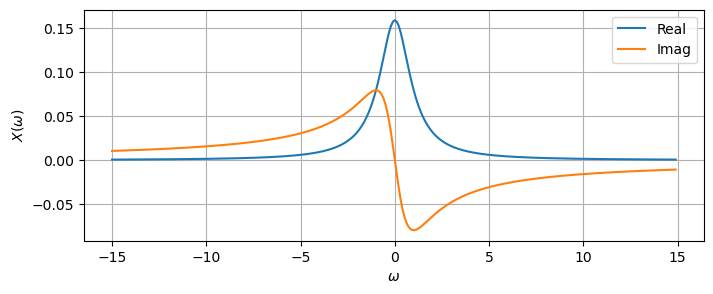

In [2]:
omega = np.arange(-15,15,0.1)
X = 1/(2*np.pi)/(alpha + 1j*omega)

plt.figure(figsize=(8, 3))
plt.plot(omega,np.real(X),label = 'Real')
plt.plot(omega,np.imag(X),label = 'Imag')
plt.grid()
plt.ylabel(r'$X(\omega)$')
plt.xlabel(r'$\omega$')
plt.legend()

## Fourier transform by numerical integration
We can also calculate the Fourier transform by numerical integration. The cell below shows how to calculate the Fourier transform by the trapezoidal rule:

In [1]:
X_num = np.zeros(omega.shape[0],dtype=complex)
for k in range(omega.shape[0]):
    X_num[k] = 1/2/np.pi*np.trapz(x*np.exp(-1j*omega[k]*t),t)

plt.figure(figsize=(8, 3))
plt.plot(omega,np.real(X_num),label='Real(Num)')
plt.plot(omega,np.imag(X_num),label = 'Imag(Num)')
plt.plot(omega,np.real(X),'--',label='Real(Analytic)')
plt.plot(omega,np.imag(X),'--',label = 'Imag(Analytic)')
plt.grid()
plt.ylabel(r'$X(\omega)$')
plt.xlabel(r'$\omega$')
plt.legend()


NameError: name 'np' is not defined

The results obtained by numerical integration is shown together with the analytical solution in the figure above. The numerical results are equal to the analytical solution.


## Calculating the Fourier transform by the FFT algorithm

The (complex) Fourier transform is defined by: 

$$X(\omega) = \frac{1}{2\pi}  \int_{-\infty} ^{\infty} x(t) e^{-i\omega t} dt$$

The discrete Fourier transform is defined by:

 $$X_k = \frac{1}{N} \sum_{n=0}^{N-1} x_n e^{-i\left(\frac{2\pi k n}{N} \right)}$$
 
 The following relation between the discrete Fourier transform and the continuous Fourier transform can then be obtained. Note that the 1/N needs to be added in the Python code since it is not included in the calculation of the FFT in the NumPy package.
 
 $$ X(\omega_k) = \frac{T}{2\pi} X_k $$
 
 Here $X(\omega_k)$ is the continuous Fourier transform while $X_k$ is the discrete Fourier transform. We can use this relation to calculate the Fourier transform by FFT.  The DFT and FFT assume that the time series starts at $t=0$. This is not the case, so it is necessary to use the first shift theorem and multiply the DFT with $e^{-i\omega t(0)}$

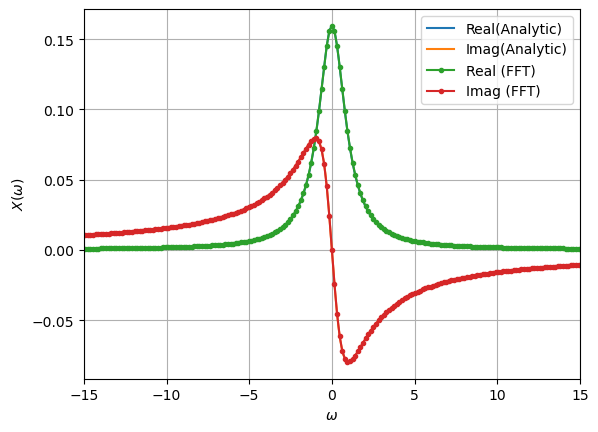

In [4]:
N=len(x) # Number of data points in time domain
dt = t[1]-t[0] # Time step
T=t[-1]*2

X_fft = np.fft.fft(x)/N # DFT
f_fft = np.fft.fftfreq(N, d=dt) # Frequency axis in Hz

X_fft = np.fft.fftshift(X_fft) # Shift elements in vector, goes from [-omega,...,0,...+omega]
f_fft = np.fft.fftshift(f_fft)

omega_fft=f_fft*2*np.pi

X_fft = X_fft*np.exp(-1j*omega_fft*1.0*t[0]) # Compensate for time axis not starting at 0

X_fft=X_fft*T/(2*np.pi) # Convert from a DFT to a continuous FT

plt.plot(omega,np.real(X),label='Real(Analytic)')
plt.plot(omega,np.imag(X),label = 'Imag(Analytic)')
plt.plot(omega_fft,np.real(X_fft),'.-',label = 'Real (FFT)')
plt.plot(omega_fft,np.imag(X_fft),'.-',label = 'Imag (FFT)')
plt.xlim((-15, 15))
plt.grid()
plt.ylabel(r'$X(\omega)$')
plt.xlabel(r'$\omega$')
plt.legend()

The figure shows that the approximation provided by the discrete Fourier transform (FFT) is very accurate. Good accuracy is achieved since the time series is long enough and a sufficiently small sampling interval has been used. Try to change the sampling interval and the duration of the time series to study how this impacts the results.